In [1]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select features (columns)

In [5]:
#df.info()
columns = list(df)

In [6]:
# Set features. This will also be used as your x values.
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]
X = df[columns[11:]]
X.head()

,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
y = df["koi_disposition"]

In [8]:
print(X.shape, y.shape)

(6991, 30) (6991,)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
X_train.head()

,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
1333,0.7420,0.1650,-0.5070,8.26200,0.21700,-0.21700,186.7,8.3,-8.3,2.72,...,-77,3.892,0.120,-0.120,1.839,0.440,-0.293,292.71445,44.082329,14.310
5313,0.6640,0.0080,-0.0080,7.06068,0.00358,-0.00358,279000.0,120.0,-120.0,63.78,...,-188,4.454,0.067,-0.202,1.000,0.295,-0.118,284.94107,42.113159,15.581
4705,0.5688,0.1308,-0.4611,4.58000,1.30000,-1.30000,595.0,220.0,-220.0,2.44,...,-209,4.473,0.052,-0.298,0.962,0.402,-0.092,290.57974,48.214218,15.087
5719,0.1018,0.3329,-0.1015,19.34000,3.10000,-3.10000,53.1,6.8,-6.8,2.36,...,-107,3.321,0.214,-0.214,3.324,2.701,-0.656,285.64093,38.418732,13.124
163,0.0000,0.3040,0.0000,3.87570,0.02090,-0.02090,507.3,4.2,-4.2,3.13,...,-75,4.162,0.033,-0.030,1.411,0.091,-0.073,284.48245,44.398041,12.346


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [15]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [50]:
# Loop through different k values to see which has the highest accuracy
# I use KNN model to test the data first

train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.585
k: 3, Train/Test Score: 0.775/0.600
k: 5, Train/Test Score: 0.727/0.607
k: 7, Train/Test Score: 0.708/0.614
k: 9, Train/Test Score: 0.699/0.621
k: 11, Train/Test Score: 0.694/0.628
k: 13, Train/Test Score: 0.690/0.630
k: 15, Train/Test Score: 0.680/0.625
k: 17, Train/Test Score: 0.676/0.625
k: 19, Train/Test Score: 0.669/0.625
k: 21, Train/Test Score: 0.659/0.624
k: 23, Train/Test Score: 0.659/0.624
k: 25, Train/Test Score: 0.661/0.632
k: 27, Train/Test Score: 0.655/0.627
k: 29, Train/Test Score: 0.652/0.632


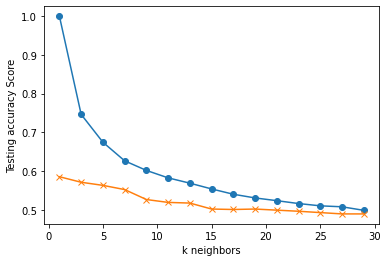

In [18]:
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [51]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Train Acc: %.3f' % knn.score(X_train_scaled, y_train))
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Train Acc: 0.690
k=13 Test Acc: 0.630


# Hyperparameter Tuning - Use `GridSearchCV`

Use `GridSearchCV` to tune the model's parameters

In [21]:
# Create the GridSearchCV model
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [64]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [5, 10, 220],
              'gamma': [0.000001, 0.000005, 0.0005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [65]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
# Here must use X_train_scaled! NOTICE
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...............................C=5, gamma=1e-06; total time=   0.7s
[CV 2/5] END ...............................C=5, gamma=1e-06; total time=   0.6s
[CV 3/5] END ...............................C=5, gamma=1e-06; total time=   0.6s
[CV 4/5] END ...............................C=5, gamma=1e-06; total time=   0.6s
[CV 5/5] END ...............................C=5, gamma=1e-06; total time=   0.7s
[CV 1/5] END ...............................C=5, gamma=5e-06; total time=   0.7s
[CV 2/5] END ...............................C=5, gamma=5e-06; total time=   0.7s
[CV 3/5] END ...............................C=5, gamma=5e-06; total time=   0.6s
[CV 4/5] END ...............................C=5, gamma=5e-06; total time=   0.6s
[CV 5/5] END ...............................C=5, gamma=5e-06; total time=   0.6s
[CV 1/5] END ..............................C=5, gamma=0.0005; total time=   0.6s
[CV 2/5] END ..............................C=5, g

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [5, 10, 220], 'gamma': [1e-06, 5e-06, 0.0005]},
             verbose=3)

In [66]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 220, 'gamma': 1e-06}
0.7192458830292754


# Save the Model

In [89]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
# filename = 'your_name.sav'
# joblib.dump(your_model, filename)
filename = 'tony.save'
joblib.dump(grid, filename)

['tony.save']

# Try TensonFlow

In [106]:
# y encoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [107]:
#y categorical
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [108]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [109]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=30))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [110]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 303       
Total params: 13,503
Trainable params: 13,503
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 5243 samples
Epoch 1/100
5243/5243 - 1s - loss: 0.9819 - accuracy: 0.5266
Epoch 2/100
5243/5243 - 0s - loss: 0.8627 - accuracy: 0.5979
Epoch 3/100
5243/5243 - 0s - loss: 0.8160 - accuracy: 0.6330
Epoch 4/100
5243/5243 - 0s - loss: 0.7939 - accuracy: 0.6395
Epoch 5/100
5243/5243 - 0s - loss: 0.7760 - accuracy: 0.6418
Epoch 6/100
5243/5243 - 0s - loss: 0.7685 - accuracy: 0.6445
Epoch 7/100
5243/5243 - 0s - loss: 0.7522 - accuracy: 0.6555
Epoch 8/100
5243/5243 - 0s - loss: 0.7317 - accuracy: 0.6622
Epoch 9/100
5243/5243 - 0s - loss: 0.7201 - accuracy: 0.6725
Epoch 10/100
5243/5243 - 0s - loss: 0.7018 - accuracy: 0.6794
Epoch 11/100
5243/5243 - 0s - loss: 0.6997 - accuracy: 0.6857
Epoch 12/100
5243/5243 - 0s - loss: 0.6903 - accuracy: 0.6815
Epoch 13/100
5243/5243 - 0s - loss: 0.6898 - accuracy: 0.6842
Epoch 14/100
5243/5243 - 0s - loss: 0.6750 - accuracy: 0.6954
Epoch 15/100
5243/5243 - 0s - loss: 0.6858 - accuracy: 0.6843
Epoch 16/100
5243/5243 - 0s - loss: 0.6724 - accuracy: 0.

In [113]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1748/1748 - 0s - loss: 0.5795 - accuracy: 0.7586
Normal Neural Network - Loss: 0.579514365719985, Accuracy: 0.7585812211036682


In [114]:
#make a prediction
encoded_predictions = model.predict_classes(X_test_scaled[:6])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [115]:
print(f"Predicted classes: {prediction_labels}")
# print(f"Predicted classes: {encoded_predictions}")
print(f"Actual Labels: {list(y_test[:6])}")

Predicted classes: ['CANDIDATE' 'FALSE POSITIVE' 'CANDIDATE' 'CONFIRMED' 'CONFIRMED'
 'CONFIRMED']
Actual Labels: ['FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'CONFIRMED', 'CONFIRMED', 'CONFIRMED']


In [116]:
# Conclusion, Tensonflow with higher accuracy with test_Acc 0.76+